Importing Dependencies

In [1934]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

Data Collection and Analysis

In [1936]:
#Inintialising and displaying the UCI dataset 
df = pd.read_csv('parkinsons.csv')
df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784          0.000070   0.00370   0.00554     0.01109       0.04374             0.426       0.02182       0.03130   0.02971      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968          0.000080   0.00465   0.00696     0.01394       0.06134             0.626       0.03134       0.04518   0.04368      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050          0.000090   0.00544   0.00781     0.01633       0.05233             0.482       0.02757       0.03858   0.03590      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997          0.000090   0.00502   0.00698     0.01505       0.05492             0.517       0.02924       0.04005   0.03772      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284          0.000110   0.00655   0.00908     0.01966       0.06425             0.584       0.03490       0.04825   0.04465      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335
5    phon_R01_S01_6      120.552       131.162       113.787         0.00968          0.000080   0.00463   0.00750     0.01388       0.04701             0.456       0.02328       0.03526   0.03243      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867  0.299111  2.187560  0.357775
6    phon_R01_S02_1      120.267       137.244       114.820         0.00333          0.000030   0.00155   0.00202     0.00466       0.01608             0.140       0.00779       0.00937   0.01351      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322  0.257682  1.854785  0.211756
7    phon_R01_S02_2      107.332       113.840       104.315         0.00290          0.000030   0.00144   0.00182     0.00431       0.01567             0.134       0.00829       0.00946   0.01256      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603  0.183721  2.064693  0.163755
8    phon_R01_S02_3       95.730       132.068        91.754         0.00551          0.000060   0.00293   0.00332     0.00880       0.02093             0.191       0.01073       0.01277   0.01717      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678  0.327769  2.322511  0.231571
9    phon_R01_S02_4       95.056       120.103        91.226         0.00532          0.000060   0.00268   0.00332     0.00803       0.02838             0.255       0.01441       0.01725   0.02444      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879  0.325996  2.432792  0.271362
10   phon_R01_S02_5       88.333       112.240        84.072         0.00505          0.000060   0.00254   0.00330     0.00763       0.02143             0.197       0.01079       0.01342   0.01892      0.03237  0.01166  21.118       1  0.611137  0.776156 -5.249770  0.391002  2.407313  0.249740
11   phon_R01_S02_6       91.904       115.871        86.292         0.00540          0.000060   0.00281   0.00336     0.00844       0.02752             0.249       0.01424       0.01641   0.02214      0.04272  0.01141  21.414       1  0.583390  0.792520 -4.960234  0.363566  2.642476  0.275931
12   phon_R01_S04_1      136.926       159.866       131.276         0.00293          0.000020   0.00118   0.00153     0.00355       0.01259             0.112       0.00656       0

In [1937]:
df.shape

(195, 24)

In [1938]:
#Checking for null values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [1939]:
#Checking for invalid values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [1940]:
#Drop rows with missing values
df = df.dropna()

In [1941]:
#Checking for duplicate values 
duplicateCount = df.duplicated().sum()
print("Number of duplicate rows: ", duplicateCount)

Number of duplicate rows:  0


In [1942]:
#Checking target varible distribution
print(df['status'].value_counts())

status
1    147
0     48
Name: count, dtype: int64


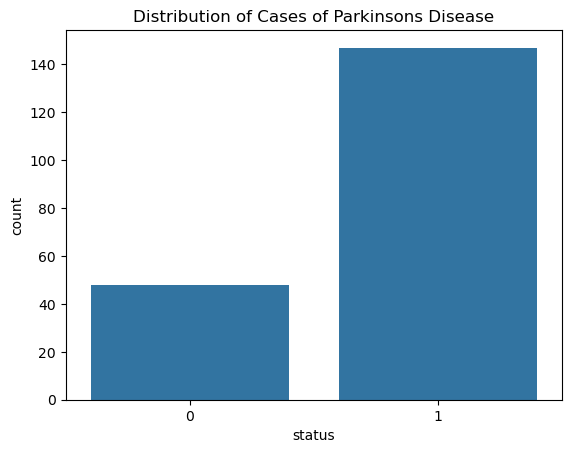

In [1943]:
#Visualisation of distribution through bar chart
sns.countplot(x=df['status'])
plt.title("Distribution of Cases of Parkinsons Disease")
plt.show()

In [1944]:
#Setting x and y variables
x = df.drop(['status', 'name'], axis=1)
y = df['status']

In [1945]:
#Shows first 5 x values 
x.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2        D2       PPE
0      119.992       157.302        74.997         0.00784           0.00007   0.00370   0.00554     0.01109       0.04374             0.426       0.02182       0.03130   0.02971      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654
1      122.400       148.650       113.819         0.00968           0.00008   0.00465   0.00696     0.01394       0.06134             0.626       0.03134       0.04518   0.04368      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674
2      116.682       131.111       111.555         0.01050           0.00009   0.00544   0.00781     0.01633       0.05233             0.482       0.02757       0.03858   0.03590      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634
3      116.676       137.871       111.366         0.00997           0.00009   0.00502   0.00698     0.01505       0.05492             0.517       0.02924       0.04005   0.03772      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975
4      116.014       141.781       110.655         0.01284           0.00011   0.00655   0.00908     0.01966       0.06425             0.584       0.03490       0.04825   0.04465      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335

In [1946]:
#Shows first 5 y values 
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [1947]:
# Split dataset into train and test sets with an 80-20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [1948]:
#Balancing the dataset using SMOTE and RandomOverSampler methods
def balance_data(method, x_train, y_train):
    # Applying RandomOverSampler and SMOTE resampling method
    if method == "RandomOverSampler":
        sampler = RandomOverSampler(random_state=42)
    elif method == "SMOTE":
        sampler = SMOTE(random_state=42)
    else:
        raise ValueError("Invalid method, please choose 'RandomOverSampler' or 'SMOTE'.")
        
    x_resampled, y_resampled = sampler.fit_resample(x_train, y_train)
    return x_resampled, y_resampled

# Applying both methods 
x_smote, y_smote = balance_data("SMOTE", x_train, y_train)
x_ros, y_ros = balance_data("RandomOverSampler", x_train, y_train)

Model Development

In [1950]:
#def evaluate_model(x, y, method, model_name):

    #x_resampled, y_resampled = sampler.fit_resample(x_train, y_train)
    
    # Initialising the chosen models
    #if model_name == "Random Forest":
        #model = RandomForestClassifier(random_state=42)
    #elif model_name == "SVM":
        #model = SVC(kernel='linear', random_state=42)  # Linear kernel for simplicity
    #elif model_name == "KNN":
        #model = KNeighborsClassifier(n_neighbors=5)  # Default 5 neighbors
    #else:
        #raise ValueError("Invalid model, please choose 'Random Forest', 'SVM', or 'KNN'.")

    # Training the model
    #model.fit(x_resampled, y_resampled)

    # Make predictions
    #y_pred = model.predict(x_test)

    # Evaluate the performance
    #data_accuracy = accuracy_score(y_test, y_pred)
    #precision = precision_score(y_test, y_pred)
    #recall = recall_score(y_test, y_pred)
    #f1 = f1_score(y_test, y_pred)

    #return data_accuracy, precision, recall, f1


In [1951]:
#methods = ["RandomOverSampler", "SMOTE"]

#results = {}

#for method in methods:
    #for model in models:
        #results[(method, model)] = evaluate_model(x, y, method, model)

# Converting results to DataFrame for better visualisation
#results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score"]).T
#results_df.columns = ["Accuracy", "Precision", "Recall", "F1-score"]

# Displaying comparison of the results
#print(results_df)

In [1952]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Implementing classification report for both classes
    print(classification_report(y_test, y_pred))

    # Confusion matrix visualisation to interpret results
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Cross-validation score fo ensuring credibility
    cv_scores = cross_val_score(model, x_train, y_train, cv=5)
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Initialising models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel="linear", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, verbosity=0, random_state=42)

}

#print("Results with RandomOverSampler:")
#evaluate_model(models["Random Forest"], x_ros, y_ros, x_test, y_test)

#print("\nResults with SMOTE:")
#evaluate_model(models["Random Forest"], x_smote, y_smote, x_test, y_test)


Model Evaluation


Results for Random Forest before data balancing:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



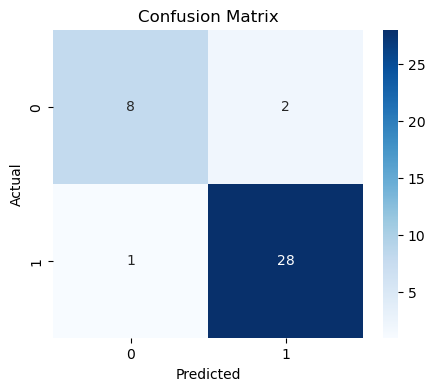

In [ ]:
# Evaluate models on imbalanced datasets
for name, model in models.items():
    print(f"\nResults for {name} before data balancing:")
    evaluate_model(model, x_train, y_train, x_test, y_test)

# Evaluate models on both balanced datasets
for method, (x_resampled, y_resampled) in {
    "RandomOverSampler": (x_ros, y_ros),
    "SMOTE": (x_smote, y_smote)
}.items():
    print(f"\n---- Evaluating Models with {method} ----")
    
    for model_name, model in models.items():
        print(f"\nResults with {method} and {model_name}:")
        evaluate_model(model, x_resampled, y_resampled, x_test, y_test)